# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('Proj1.csv')
df.head(3)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264


In [3]:
df.drop(columns = ['Sample ID','Sl No', 'Age'], axis = 1 , inplace=True)

In [4]:
print(df.shape)

(1100, 11)


In [5]:
df.isnull().sum().sort_values(ascending=False)

Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

# Check the unique values of Gender and Label encode the categorical predictor

In [6]:
print(df['Gender'].unique())

['Female' 'Male']


In [7]:
print(df['Gender'].value_counts())

Male      550
Female    550
Name: Gender, dtype: int64


In [8]:
label_encoder  = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [9]:
df.describe()

,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.500000,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,0.500227,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,0.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,0.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,0.500000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,1.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [10]:
x =df.iloc [ :, 1:]
x

,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...
1095,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [11]:
y = df.iloc[ :, 0]
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int32

# Normalization of the Data



In [12]:
norm = Normalizer()
norm = norm.fit_transform(x)

# Split Train and Test set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape , x_test.shape 

((880, 10), (220, 10))

In [14]:
x_train.shape ,y_train.shape

((880, 10), (880,))

# Pearson Correlation on x_train data only 

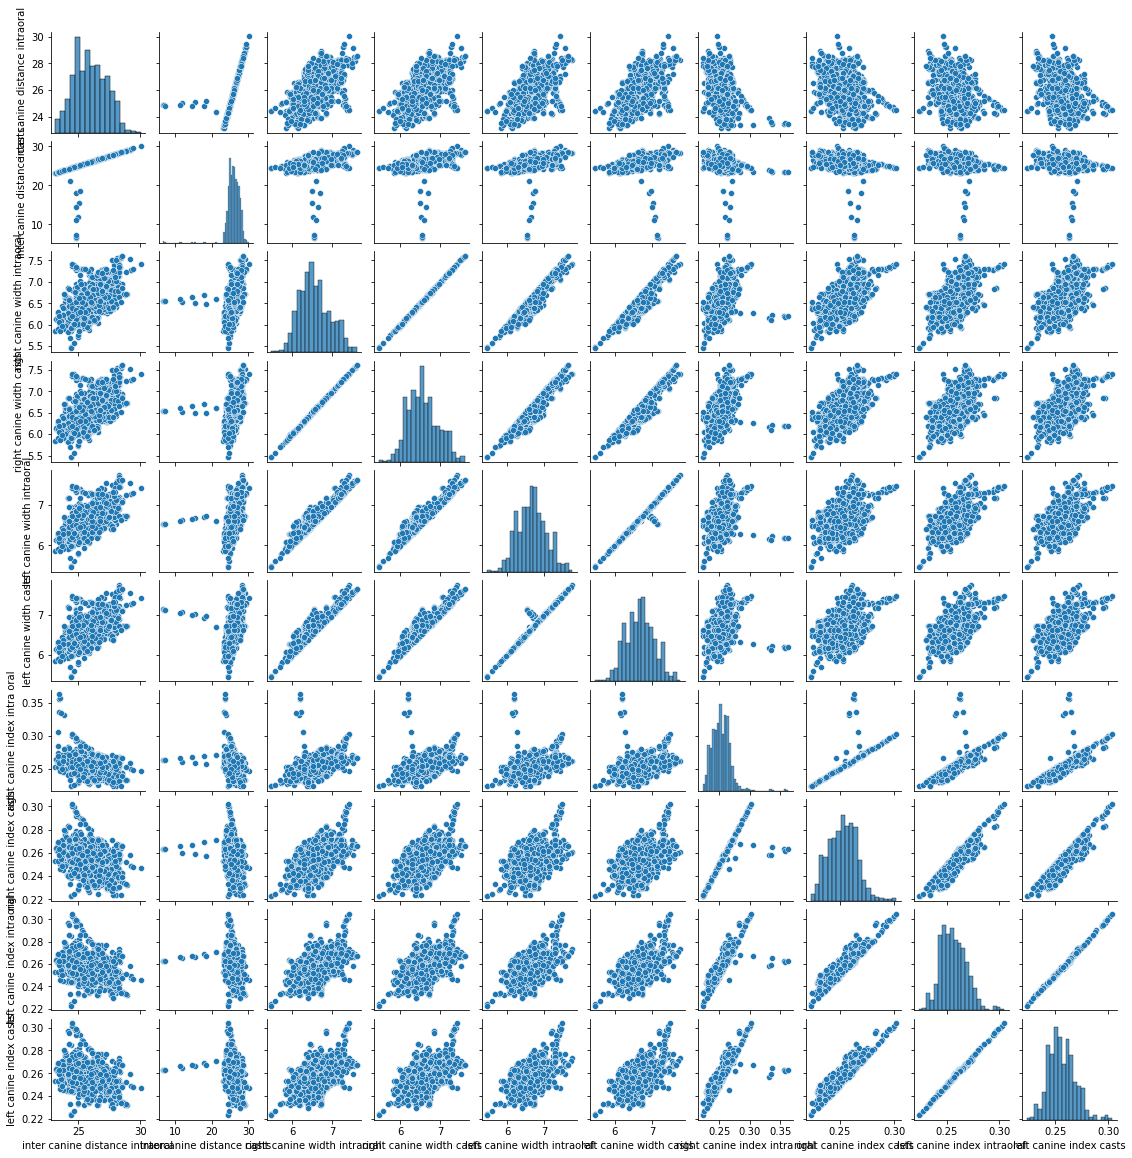

In [15]:
sns.pairplot(x_train , height = 1.6)

In [16]:
x_train.corr()

,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
inter canine distance intraoral,1.000000,0.722499,0.555923,0.557537,0.596803,0.583293,-0.373016,-0.343008,-0.334089,-0.329798
intercanine distance casts,0.722499,1.000000,0.371281,0.372616,0.410549,0.320540,-0.292402,-0.283928,-0.267175,-0.264836
right canine width intraoral,0.555923,0.371281,1.000000,0.999826,0.942592,0.936929,0.456984,0.587693,0.524771,0.527703
right canine width casts,0.557537,0.372616,0.999826,1.000000,0.943664,0.937887,0.455287,0.586242,0.524391,0.527343
left canine width intraoral,0.596803,0.410549,0.942592,0.943664,1.000000,0.992904,0.360697,0.488584,0.554384,0.557940
left canine width casts,0.583293,0.320540,0.936929,0.937887,0.992904,1.000000,0.366727,0.495599,0.560456,0.564208
right canine index intra oral,-0.373016,-0.292402,0.456984,0.455287,0.360697,0.366727,1.000000,0.882246,0.806071,0.805154
right canine index casts,-0.343008,-0.283928,0.587693,0.586242,0.488584,0.495599,0.882246,1.000000,0.923997,0.923156
left canine index intraoral,-0.334089,-0.267175,0.524771,0.524391,0.554384,0.560456,0.806071,0.923997,1.000000,0.999335
left canine index casts,-0.329798,-0.264836,0.527703,0.527343,0.557940,0.564208,0.805154,0.923156,0.999335,1.000000


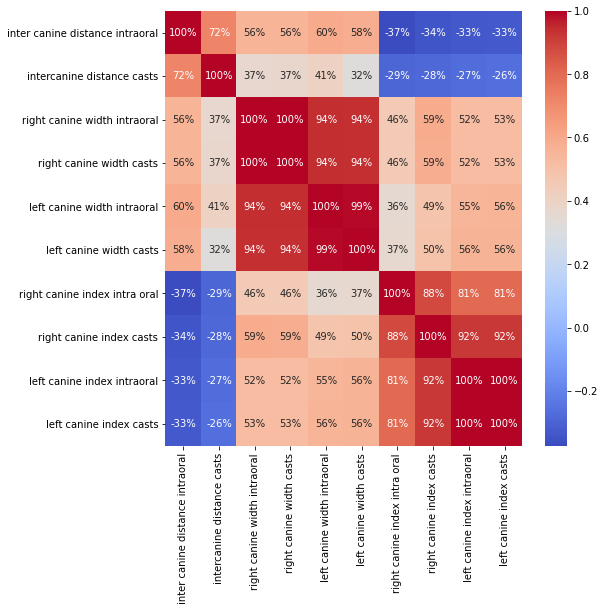

In [17]:
plt.figure(figsize = (8,8))
cor=x_train.corr()
sns.heatmap(cor, annot = True, cmap ='coolwarm' , fmt = '.0%')
plt.show()


# Creating the Correlation matrix and Selecting the Upper trigular matrix

In [18]:
cor_matrix = x_train.corr()
cor_matrix1 = x_test.corr()
print(cor_matrix,cor_matrix1)

                                 inter canine distance intraoral  \
inter canine distance intraoral                         1.000000   
intercanine distance casts                              0.722499   
right canine width intraoral                            0.555923   
right canine width casts                                0.557537   
left canine width intraoral                             0.596803   
left canine width casts                                 0.583293   
right canine index intra oral                          -0.373016   
right canine index casts                               -0.343008   
left canine index intraoral                            -0.334089   
left canine index casts                                -0.329798   

                                 intercanine distance casts  \
inter canine distance intraoral                    0.722499   
intercanine distance casts                         1.000000   
right canine width intraoral                       0.371281   

In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri1 = cor_matrix1.where(np.triu(np.ones(cor_matrix1.shape),k=1).astype(bool))
print(upper_tri,upper_tri1)

                                 inter canine distance intraoral  \
inter canine distance intraoral                              NaN   
intercanine distance casts                                   NaN   
right canine width intraoral                                 NaN   
right canine width casts                                     NaN   
left canine width intraoral                                  NaN   
left canine width casts                                      NaN   
right canine index intra oral                                NaN   
right canine index casts                                     NaN   
left canine index intraoral                                  NaN   
left canine index casts                                      NaN   

                                 intercanine distance casts  \
inter canine distance intraoral                    0.722499   
intercanine distance casts                              NaN   
right canine width intraoral                            NaN   

# Droping the column with high correlation

In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.94)]
to_drop1 = [column for column in upper_tri1.columns if any(upper_tri1[column] > 0.94)]
print(); print(to_drop,to_drop1)


['right canine width casts', 'left canine width intraoral', 'left canine width casts', 'left canine index casts'] ['intercanine distance casts', 'right canine width casts', 'left canine width intraoral', 'left canine width casts', 'left canine index casts']


In [21]:
new_df = x_train.drop(x_train[to_drop], axis=1)
list(new_df)

['inter canine distance intraoral',
 'intercanine distance casts',
 'right canine width intraoral',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral']

In [22]:
new_df1 = x_test.drop(x_test[to_drop1],axis=1)
list(new_df1)

['inter canine distance intraoral',
 'right canine width intraoral',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral']

# Model Building 

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import catboost as ctb

# The below algorithim has been applied 
Support Vector Machine,
Logistic Regression,
Random forest classifier,
k-Nearest Neighbors,
Decision Trees classifier,
Extra tree classifier,
Naive Bayes,
Catboost

In [24]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_train)
y_pred1 = svc.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       437
           1       0.75      0.74      0.75       443

    accuracy                           0.75       880
   macro avg       0.75      0.75      0.75       880
weighted avg       0.75      0.75      0.75       880

[[84 29]
 [29 78]]


In [25]:
svc = SVC()
print(cross_val_score(svc,x_train,y_train, cv=30,scoring ='accuracy').mean())
print(cross_val_score(svc,x_test,y_test, cv=30,scoring ='accuracy').mean())

0.7433333333333333
0.6220238095238096


In [26]:
logit_r = LogisticRegression()
logit_r.fit(x_train,y_train)
y_pred = logit_r.predict(x_train)
y_pred1 = logit_r.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       437
           1       0.80      0.79      0.79       443

    accuracy                           0.79       880
   macro avg       0.79      0.79      0.79       880
weighted avg       0.79      0.79      0.79       880

[[92 21]
 [20 87]]


In [27]:
logit_r = LogisticRegression()
print(cross_val_score(logit_r,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(logit_r,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.7897727272727273
0.7954545454545454


In [28]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_train)
y_pred1 = KNN.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       437
           1       0.94      0.91      0.93       443

    accuracy                           0.93       880
   macro avg       0.93      0.93      0.93       880
weighted avg       0.93      0.93      0.93       880

[[97 16]
 [20 87]]


In [29]:
KNN = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(KNN,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(KNN,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.8454545454545455
0.8227272727272726


In [30]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred= GNB.predict(x_train)
y_pred1= GNB.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       437
           1       0.80      0.72      0.76       443

    accuracy                           0.77       880
   macro avg       0.77      0.77      0.77       880
weighted avg       0.77      0.77      0.77       880

[[93 20]
 [29 78]]


In [31]:
GNB = GaussianNB()
print(cross_val_score(GNB,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(GNB,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.7681818181818182
0.7727272727272727


In [32]:
Dtc = DecisionTreeClassifier(max_depth = 5)
Dtc.fit(x_train, y_train)
y_pred = Dtc.predict(x_train)
y_pred1 = Dtc.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       437
           1       0.87      0.87      0.87       443

    accuracy                           0.87       880
   macro avg       0.87      0.87      0.87       880
weighted avg       0.87      0.87      0.87       880

[[91 22]
 [19 88]]


In [33]:
Dtc = DecisionTreeClassifier(max_depth = 5)
print(cross_val_score(Dtc,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(Dtc,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.8125
0.7909090909090909


In [34]:
r_clf=RandomForestClassifier(n_estimators=5)
r_clf.fit(x_train,y_train)
y_pred=r_clf.predict(x_train)
y_pred1=r_clf.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       437
           1       0.99      0.99      0.99       443

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880

[[94 19]
 [11 96]]


In [35]:
r_clf=RandomForestClassifier(n_estimators=5)
print(cross_val_score(r_clf,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(r_clf,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.8625
0.8181818181818181


In [36]:
Extra_tree_forest = ExtraTreesClassifier(n_estimators = 3,criterion ='entropy', max_features = 2)
Extra_tree_forest.fit(x_train, y_train)
y_pred = Extra_tree_forest.predict(x_train)
y_pred1 = Extra_tree_forest.predict(x_test)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00       443

    accuracy                           1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880

[[95 18]
 [11 96]]


In [37]:
Extra_tree_forest = ExtraTreesClassifier(n_estimators = 3,criterion ='entropy', max_features = 2)
print(cross_val_score(Extra_tree_forest,x_train,y_train, cv=10,scoring ='accuracy').mean())
print(cross_val_score(Extra_tree_forest,x_test,y_test, cv=10,scoring ='accuracy').mean())

0.8613636363636363
0.7909090909090909


# CatBoost classifier
1.CatBoost has a very good vector representation of categorical data. It takes concepts of ordered boosting and applies the same to response coding.
2.In response coding, we represent categorical features using the mean to the target values of the data points. We are representing a feature value of each data point by using its class label.
3.CatBoost vectorize all the categorical features without any target leakage. Instead of considering all the data points, it will consider only data points that are past in time.

In [38]:
CBC = ctb.CatBoostClassifier()
CBC.fit(x_train, y_train)
print(CBC)

Learning rate set to 0.009755
0:	learn: 0.6851970	total: 150ms	remaining: 2m 30s
1:	learn: 0.6767737	total: 154ms	remaining: 1m 16s
2:	learn: 0.6691511	total: 158ms	remaining: 52.5s
3:	learn: 0.6624817	total: 162ms	remaining: 40.2s
4:	learn: 0.6538951	total: 165ms	remaining: 32.9s
5:	learn: 0.6469381	total: 169ms	remaining: 28s
6:	learn: 0.6399321	total: 172ms	remaining: 24.4s
7:	learn: 0.6339756	total: 177ms	remaining: 21.9s
8:	learn: 0.6287683	total: 181ms	remaining: 19.9s
9:	learn: 0.6219627	total: 187ms	remaining: 18.5s
10:	learn: 0.6162388	total: 193ms	remaining: 17.3s
11:	learn: 0.6093825	total: 198ms	remaining: 16.3s
12:	learn: 0.6034682	total: 204ms	remaining: 15.5s
13:	learn: 0.5966215	total: 210ms	remaining: 14.8s
14:	learn: 0.5913928	total: 213ms	remaining: 14s
15:	learn: 0.5853593	total: 217ms	remaining: 13.3s
16:	learn: 0.5795732	total: 221ms	remaining: 12.8s
17:	learn: 0.5742209	total: 225ms	remaining: 12.3s
18:	learn: 0.5692365	total: 229ms	remaining: 11.8s
19:	learn: 0.

In [39]:
expected_y  = y_test
predicted_y = CBC.predict(x_test)

In [40]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       113
           1       0.89      0.90      0.89       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

[[101  12]
 [ 11  96]]
